# Exercises 6.02 - Nonlinear regression

## Exercise 1 - Fitting a quadratic function
The file `6.02_nonlinear_regression_exercises_2.npz` contains `x` and `y` values.

- Fit a quadratic function of the form  $y = a + b * (x + c)^2$ to describe the relationship between x and y. 
- Generate predictions (one for each x-value) and overlay them on the data. Is your curve a good fit to the data?
- Quantify the goodness of fit.

In [1]:
# your solution here

## Exercise 2 - Specifying initial parameter values
Below code attempts to fit an exponential function to the data. However, as you can see, the prediction does not match the data. Modify the initial parameter values used for fitting to make it work.

To do so, think about what how the different function parameters relate to specific properties of the data. Your function is $y = g * e^{-x/\tau}$. 
- The initial values are set by the gain parameter $g$. In other words: At $x=0$, the function evaluates to $y=g$. 
- $\tau$ corresponds to the "time" it takes until the function drops to 0.36 of the value at x=0. (The x-value at which y=0.36g) 

Using that knowledge you can estimate good starting values for $g$ and $\tau$ either visually or you can extract them directly from the data using simple heuristics.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['x', 'y']
[ 2.25718641e-11 -9.99999997e-01]


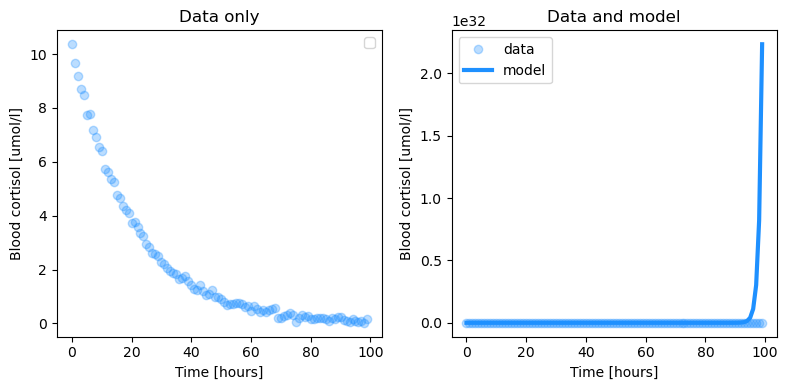

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# load the data
data = np.load('6.02_nonlinear_regression_exercises_2.npz')
print(list(data.keys()))
x = data['x']
y = data['y']

# plot the data
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(x, y, 'o', alpha=0.3, c='dodgerblue')
plt.xlabel('Time [hours]')
plt.ylabel('Blood cortisol [umol/l]')
plt.title('Data only')
plt.legend()

# define the model function
def exp_fun(x, gain, tau):
    return gain * np.exp(-x / tau)

# fit with initial params
# these initial parameters are wrong - estimate them visually or extract them from the data
initial_params = [-100, -1]

popt, pcov = scipy.optimize.curve_fit(exp_fun, x, y, initial_params)
print(popt)

# generate predictions
y_pred = exp_fun(x, *popt)

# plot data and predictions
plt.subplot(122)
plt.plot(x, y, 'o', alpha=0.3, c='dodgerblue', label='data')
plt.plot(x, y_pred, c='dodgerblue', linewidth=3, label='model')
plt.xlabel('Time [hours]')
plt.ylabel('Blood cortisol [umol/l]')
plt.title('Data and model')

plt.legend()
plt.tight_layout()
plt.show()